# RETO


Os animamos a que realicéis este ejercicio inspirado en el proyecto indicado por Aemet. En nuestro caso emplearemos como fuente de datos un repositorio abierto, el de la universidad de Irvine: 
Repositorio: https://archive.ics.uci.edu/ml/datasets/Forest+Fires


Deberemos analizar y transformar los datos buscando un buen predictor para la variable de área afectada. Dado que se trata de una serie con gran cantidad de ceros (por suerte) nos recomiendan emplear una transformación logarítmica de los datos.
Transformación del logaritmo: https://www.cuemath.com/algebra/log-to-exponential-form/



Estudio de AEMET

[AEMET Estadística del índice meteorológico de riesgo de incendio](AEMET.pdf)	

## DATA

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.



In [44]:
!pip install ucimlrepo
!pip install matplotlib



[notice] A new release of pip available: 22.3 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import pandas as pd
import numpy as np

In [46]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 
  


In [47]:
# metadata 
print(forest_fires.metadata) 


{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'title': 'A data mining approach to predict forest fires using meteorological data', 'authors': 'P. Cortez, A

In [48]:
# variable information 
print(forest_fires.variables) 


     name     role         type demographic  \
0       X  Feature      Integer        None   
1       Y  Feature      Integer        None   
2   month  Feature  Categorical        None   
3     day  Feature  Categorical        None   
4    FFMC  Feature   Continuous        None   
5     DMC  Feature      Integer        None   
6      DC  Feature   Continuous        None   
7     ISI  Feature   Continuous        None   
8    temp  Feature   Continuous        None   
9      RH  Feature      Integer        None   
10   wind  Feature   Continuous        None   
11   rain  Feature      Integer        None   
12   area   Target      Integer        None   

                                          description            units  \
0   x-axis spatial coordinate within the Montesinh...             None   
1   y-axis spatial coordinate within the Montesinh...             None   
2                  month of the year: 'jan' to 'dec'              None   
3                     day of the week: 'mon' 

In [49]:
forest_fires.data.features.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0


In [50]:
forest_fires.data.features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB


In [51]:
forest_fires.data.features.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [52]:
forest_fires.data.targets.head(10)

,area
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [53]:
forest_fires.data.features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB


In [54]:
forest_fires.data.targets.describe()

,area
count,517.000000
mean,12.847292
std,63.655818
min,0.000000
25%,0.000000
50%,0.520000
75%,6.570000
max,1090.840000


In [55]:
df = pd.DataFrame(data=X, columns=forest_fires.feature_names)
df['target'] = y

In [56]:
print("Data Types:", df.dtypes)

Data Types: X           int64
Y           int64
month      object
day        object
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
target    float64
dtype: object


In [57]:
numeric_df = df.select_dtypes(include=['number'])


In [58]:
print("Correlation:", numeric_df.corr(method='pearson'))

Correlation:                X         Y      FFMC       DMC        DC       ISI      temp  \
X       1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258   
Y       0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103   
FFMC   -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC    -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594   
DC     -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI     0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287   
temp   -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000   
RH      0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind    0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain    0.065387  0.033234  0.056702  0.074790  0.035861  0.067668  0.069491   
target  0.063385  0.044873  0.040122  0.072994  0.049383  0.008258  0.097844   

              RH      wind

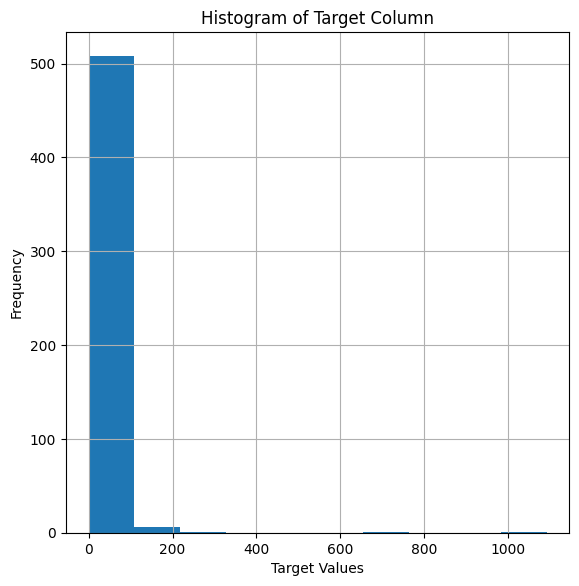

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6.5, 6.5))
df['target'].hist()

plt.title('Histogram of Target Column')
plt.xlabel('Target Values')
plt.ylabel('Frequency')

plt.show()